Text(0.5, 0.92, ' Distributions with two-dimensional Bayes optimal separating plane')

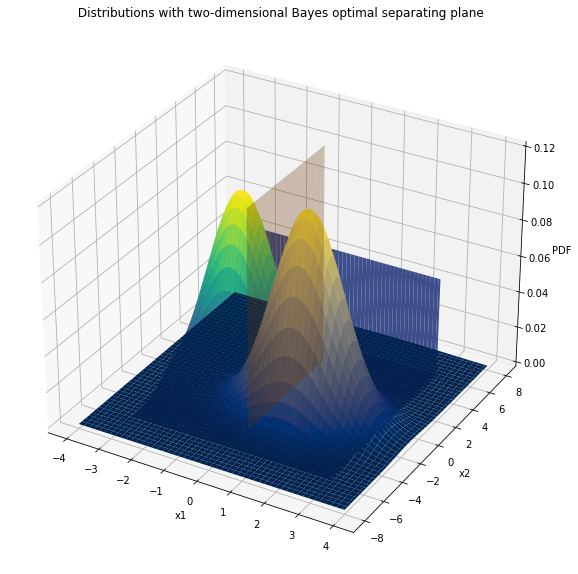

In [26]:
import numpy as np
import matplotlib.pyplot as plt
N=100
d=2
mean = np.array([[-1],[1]])
cov = np.array([[1, 0], [0, 2]])
s_1, s_2 = cov[0,0], cov[1,1]

x = np.linspace(-3*s_1, 3*s_1, num=100)
y = np.linspace(-3*s_2, 3*s_2, num=100)
X, Y = np.meshgrid(x,y)

x_total=np.zeros((2,100))
x_mat=np.zeros((2,N))           
for i in range(N):
    x_mat= np.array([X[i,:], Y[i,:]])
    x_total=np.append(x_mat,x_total,axis=0)
    
x_total=np.delete(x_total,0,axis=0)
x_total=np.delete(x_total,0,axis=0)

mean_new=np.tile(mean, (1, 100))
mean_new=np.tile(mean_new,(100, 1))
X_new=x_total-mean_new
pdf = np.zeros(X.shape)
k=0
for j in range(100):
    x_opt=X_new[k:k+2,0:,]
    for i in range(100):
        x=x_opt[:,i].reshape(2,1)
        p_out = 1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(cov))) * np.exp(-(np.linalg.solve(cov, x).T.dot(x / 2)))
        pdf[j,i]=p_out
    k=k+2

#for the second gaussian distribution

mean1 = np.array([[1],[1]])
cov1 = np.array([[1, 0], [0, 2]])
s_11, s_21 = cov[0,0], cov[1,1]

x1 = np.linspace(-4*s_11, 4*s_11, num=100)
y1 = np.linspace(-4*s_21, 4*s_21, num=100)
X1, Y1 = np.meshgrid(x1,y1)

x_total1=np.empty((2,100))
x_mat1=np.zeros((2,N))           
for i in range(N):
    x_mat1= np.array([X1[i,:], Y1[i,:]])
    x_total1=np.append(x_mat1,x_total1,axis=0)
    
x_total1=np.delete(x_total1,0,axis=0)
x_total1=np.delete(x_total1,0,axis=0)

mean_new1=np.tile(mean1, (1, 100))
mean_new1=np.tile(mean_new1,(100, 1))
X_new1=x_total1-mean_new1

k=0
pdf1=np.zeros((100,100))
for j in range(100):
    x_opt1=X_new1[k:k+2,0:,]
    for i in range(100):
        x1=x_opt1[:,i].reshape(2,1)
        p_out1 = 1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(cov1))) * np.exp(-(np.linalg.solve(cov1, x1).T.dot(x1 / 2)))
        pdf1[j,i]=p_out1
    k=k+2

#plotting things
y_sep = np.linspace(-4,4,100)  
Z = np.linspace(0,0.12,100)
y_sep,Z = np.meshgrid(y_sep,Z)
x_sep = y_sep*0

fig = plt.figure(figsize=(20,10))  
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis',antialiased=True, zorder = 0.5)
ax.plot_surface(x_sep,y_sep,Z,alpha=0.3)
ax.plot_surface(X1, Y1, pdf1, cmap = 'cividis')

plt.xlabel("x1")
plt.ylabel("x2")
ax.set_zlabel("PDF")
ax.set_title(' Distributions with two-dimensional Bayes optimal separating plane')

